In [1]:
%env QHL_NUMPY=jax

import time
import matplotlib.pyplot as plt
from model import *
from data_loader import *
from layers_init import *
from jax.example_libraries.optimizers import adam, adamax

layer_sizes = [4, 4]

params = init_network_params(layer_sizes, random.PRNGKey(0))
step_size = 0.1
num_epochs = 10
num_it = 1
batch_size = 160
n_targets = 4
kernel_size = 8
kernel_numb = 1
num_quantum = 1
num_conv = 1
kernel = np.random.randn(kernel_numb, kernel_size, kernel_size)
kernel2 = np.random.randn(kernel_numb, int(kernel_size/2), int(kernel_size/2))

theta = jnp.asarray(0.1*np.random.random((num_quantum, 6)))
theta_small = jnp.asarray(0.1*np.random.random((num_quantum, 5)))
theta14 = jnp.asarray(90*np.random.random(24), dtype = int)
print(len(theta))
print(len(params))
params.insert(0, theta_small)
params.insert(0, theta)

loss_history = []
loss_history_train = []
loss_history_test = []
train_accuracy = []
test_accuracy = []
step_size = 0
opt_init, opt_state, get_params = adam(1e-3, b1 = 0.9, b2 = 0.999)
opt_state = opt_init(params)

training_generator, train_images, train_labels, test_images, test_labels = data(batch_size, n_targets)
train_images, train_labels = filter_(train_images, train_labels)
test_images, test_labels = filter_(test_images, test_labels )

for epoch in range(num_epochs):
    start_time = time.time()
    for x, y in training_generator:
        x, y = filter_(x, y)
        for it in range(num_it):
            yy = one_hot(y, n_targets)
            
            loss_res, opt_state = update(opt_state, x, yy, step_size, optimizer = adam(1e-3, b1 = 0.9, b2 = 0.999), theta = theta, conv=None)
            loss_history.append(float(loss_res))
            step_size += batch_size

    epoch_time = time.time() - start_time
    params = get_params(opt_state)
    #loss_train = loss(params, train_images, train_labels, theta = None, conv=my_conv)
    loss_test = loss(params, test_images, test_labels, theta = theta, conv=None)
    #loss_history_train.append(float(loss_train))
    loss_history_test.append(float(loss_test))
    train_acc = accuracy(params, train_images, train_labels, theta = theta, conv=None)
    test_acc = accuracy(params, test_images, test_labels, theta = theta, conv=None)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    # f.write(f"Epoch {epoch} in {epoch_time} sec" + '\n')
    # f.write(f"Training set accuracy {format(train_acc)} loss {loss_history[-1]}" + '\n')
    # f.write("Test set accuracy {}".format(test_acc))
    print("Epoch {} in {:0.2f} sec".format(epoch, epoch_time))
    print(f"Training set accuracy {format(train_acc)} loss {loss_history[-1]}")
    print("Test set accuracy {}".format(test_acc))
    # print(f'theta = {90*params[0]}')
print(max(test_accuracy))


env: QHL_NUMPY=jax
Using JAX.


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


1
1


/home/keckikon/q_env/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/keckikon/q_env/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/home/keckikon/q_env/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning:

(34,) None[0]C[0]X[2]None[1]None[2]C[1]X[3]C[2]X[1]None[3]None[1]C[2]X[0]C[3]X[0]C[3]X[1]C[2]X[1]M(0)M(1)
(29,) None[0]C[0]X[2]None[1]None[2]C[1]X[3]C[2]X[1]None[3]None[1]C[2]X[0]C[3]X[0]C[3]X[1]C[2]X[1]M(0)M(1)
(33,) None[0]C[0]X[2]None[1]None[2]C[1]X[3]C[2]X[1]None[3]None[1]C[2]X[0]C[3]X[0]C[3]X[1]C[2]X[1]M(0)M(1)
(40,) None[0]C[0]X[2]None[1]None[2]C[1]X[3]C[2]X[1]None[3]None[1]C[2]X[0]C[3]X[0]C[3]X[1]C[2]X[1]M(0)M(1)
(35,) None[0]C[0]X[2]None[1]None[2]C[1]X[3]C[2]X[1]None[3]None[1]C[2]X[0]C[3]X[0]C[3]X[1]C[2]X[1]M(0)M(1)
(41,) None[0]C[0]X[2]None[1]None[2]C[1]X[3]C[2]X[1]None[3]None[1]C[2]X[0]C[3]X[0]C[3]X[1]C[2]X[1]M(0)M(1)
(30,) None[0]C[0]X[2]None[1]None[2]C[1]X[3]C[2]X[1]None[3]None[1]C[2]X[0]C[3]X[0]C[3]X[1]C[2]X[1]M(0)M(1)
(32,) None[0]C[0]X[2]None[1]None[2]C[1]X[3]C[2]X[1]None[3]None[1]C[2]X[0]C[3]X[0]C[3]X[1]C[2]X[1]M(0)M(1)
(37,) None[0]C[0]X[2]None[1]None[2]C[1]X[3]C[2]X[1]None[3]None[1]C[2]X[0]C[3]X[0]C[3]X[1]C[2]X[1]M(0)M(1)
(36,) None[0]C[0]X[2]None[1]None[2]C[1]X[3]C[2

TypeError: reshape new_sizes must all be positive, got (0, -1).

In [ ]:
print(max(test_accuracy))
print(max(train_accuracy))
# import time
# from model import *
# from data_loader import *
# from layers_init import *
# from jax.example_libraries.optimizers import adam, adamax

# pic = SV(np.random.rand(1,2,2,2,2,2,2))
# theta = jnp.asarray(90*np.random.random((6)))
# print(theta.shape)
# Param_Shift(Сircuit_9, theta, pic)


In [ ]:
%time
start_time = time.time()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss}$')
title = ax.set_title(r'${\rm training\ history, quantum}$')
epoch_time = time.time() - start_time
print(epoch_time)

In [ ]:
train_accuracy

In [ ]:
test_accuracy[-1]


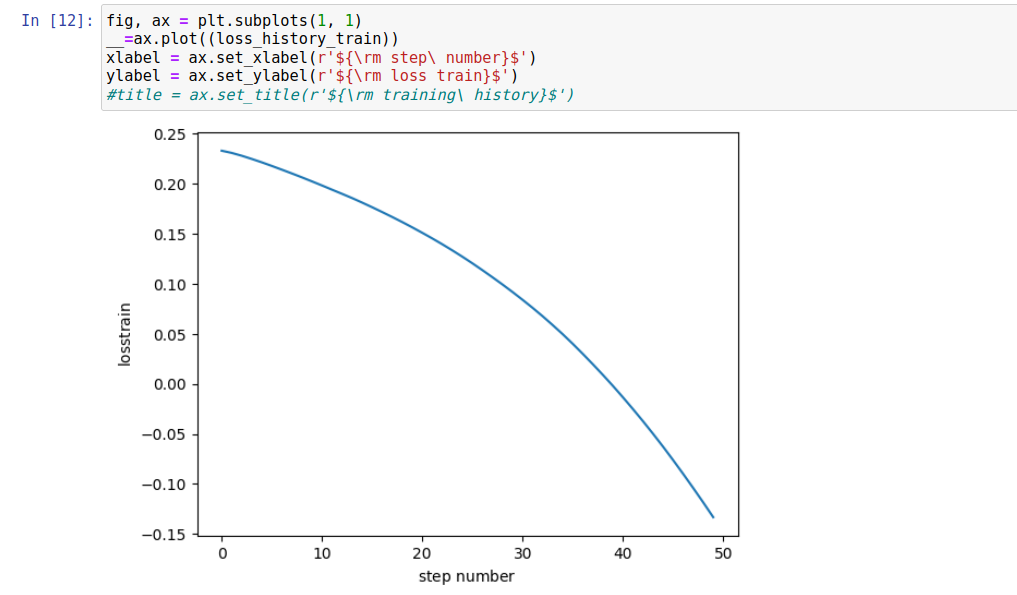



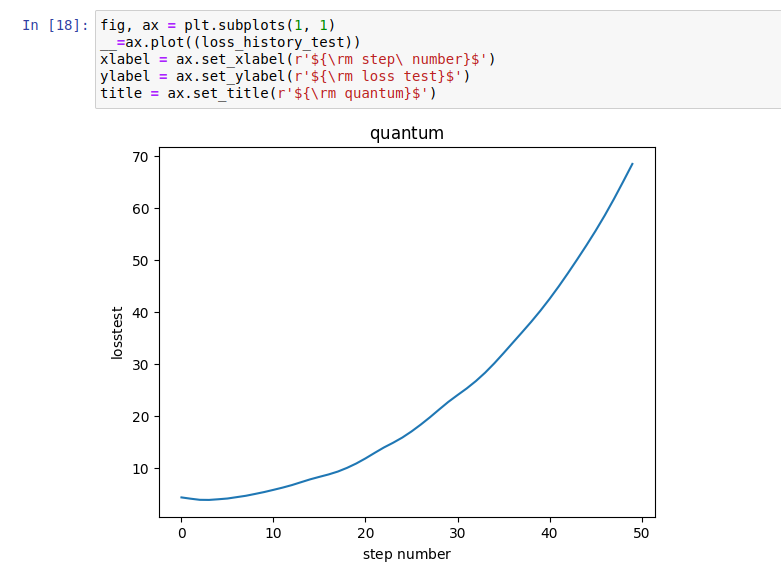

In [ ]:
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history_train))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss train}$')
title = ax.set_title(r'${\rm quantum}$')

In [ ]:
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history_test))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss test}$')
title = ax.set_title(r'${\rm quantum}$')

In [ ]:
theta = jnp.asarray(90*np.random.random((3,6)), dtype = int)
theta1 = np.random.randint(90, size=(1, 6))
print(theta, theta1)

In [ ]:
import jax.numpy as jnp
from qhollab import *
from quantum import *

In [ ]:
num_quantum =1
image = jnp.ones(6)
theta14 = jnp.asarray(0.1*np.random.random((num_quantum, 24)))
circ = Circuit_14(theta14[0])
Pooling_q(circ)

In [ ]:
theta = jnp.asarray(0.1*np.random.random((num_quantum, 8)))
theta_small = jnp.asarray(0.1*np.random.random((num_quantum, 4)))
circ = Сircuit_9(theta[0], img)
circ = Pooling_q(circ)
circ *= Сircuit_9(theta_small[0], img/2)

In [ ]:
img = SV(np.random.rand(1,2,2,2,2,2,2,2,2))
res = simulate(circ, img).data
res.reshape(1,8)

In [ ]:
circ_ = Сircuit_9(theta[0])*Measurement(0)*Measurement(1)*Measurement(2)*Measurement(3)*Measurement(4)*Measurement(5)
res_ = simulate(circ_, img).data

In [ ]:
res_.reshape(8,8)

In [ ]:
circ

In [ ]:
Сircuit_9(theta[0], img)

In [ ]:
len(img.data_shape)


In [ ]:
Сircuit_9(theta_small[0], Pooling_q(img))

In [ ]:
Pooling_q(Сircuit_9(theta[0]))

In [ ]:
a = np.random.rand(234)

In [ ]:
print(f'{a:0.2f}')

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
__=ax.plot((a))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss}$')
title = ax.set_title(r'${\rm training\ history, quantum}$')
fig.savefig('test.pdf')